In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from proj1_helpers import *
from implementations import *
from plots import *
from utils import *
from validation import *
from preproccess_utils import *
from validation_baseline import *
import seaborn as sns
%load_ext autoreload
%autoreload 2

# Load the training data, splitting it into train and test splits and normalizing it:

**Here we apply only standartization to the data without additional preprocessing to see how our data preprocess will affect to the results.**

In [2]:
# loading data
DATA_TRAIN_PATH = 'data/train.csv'
labels, input_data, ids = load_csv_data(DATA_TRAIN_PATH)

In [3]:
# splitting data in train and test splits and fixing seed the results to be reproducible
seed = 46
ratio = 0.8
x_train, y_train, x_test, y_test = split_data(input_data, labels, ratio=ratio, seed=seed)

In [4]:
# standardize train data : 
x_train, mean_x, std_x = standardize(x_train)
y_train, x_train = build_model_data(x_train, y_train)

# standardize test data :
x_test = (x_test - mean_x)/std_x
y_test, x_test = build_model_data(x_test, y_test)

# Running cross validation for all models, obtaining best hyper-parameters and best accuracy.

## 1. Least Squares GD

### Cross validation for the least squares GD

100%|██████████| 5/5 [04:17<00:00, 51.57s/it]


Accuracy is 0.6969


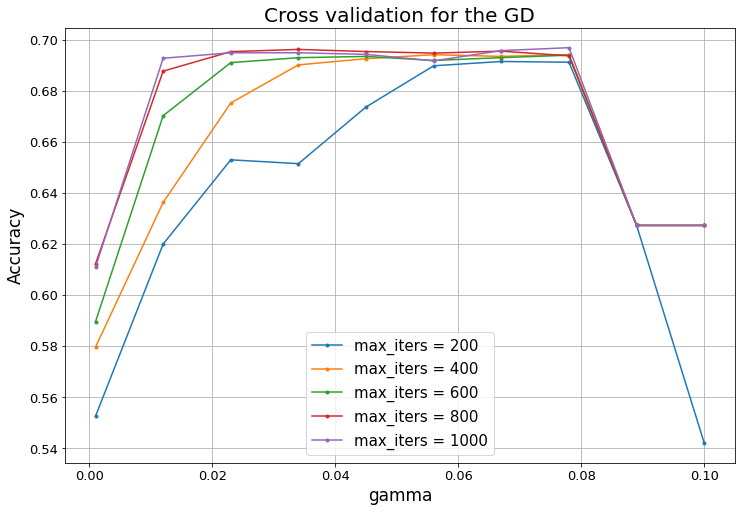

In [5]:
# parameters setting
type_ = 'GD'
bd_left = -3
bd_right = -1
# grid for hyperparameters
gammas = np.linspace(10**bd_left, 10**bd_right, 10)
max_iters = np.arange(200, 1200, 200)
# cross validation
cross_validation_demo_baseline(type_=type_, y=y_train, tx=x_train, bd_left=bd_left, bd_right=bd_right, gammas=gammas, max_iters=max_iters, seed=seed)

**The best gamma = 0.07 and the best max_iter = 1000.  
We can see that there is no need to increase the max_iters parameter, because it doesn't bring accuracy improvements**

### Let's now apply best hyper-parameters to the model

In [6]:
max_iters = 1000
gamma = 0.07

np.random.seed(seed)
initial_w = np.random.rand((x_train.shape[1]))
w, loss = least_squares_GD(y_train, x_train, initial_w, max_iters, gamma, plot_loss = False)
y_pred = predict_labels(w, x_test)

print("accuracy :", accuracy(y_pred, y_test))

accuracy : 0.69578


**Best accuracy for Least squares GD without data preprocessing is 0.69578**

## 2. Least Squares SGD

### Cross validation for the least squares SGD

100%|██████████| 6/6 [06:47<00:00, 67.90s/it]


Accuracy is 0.6944


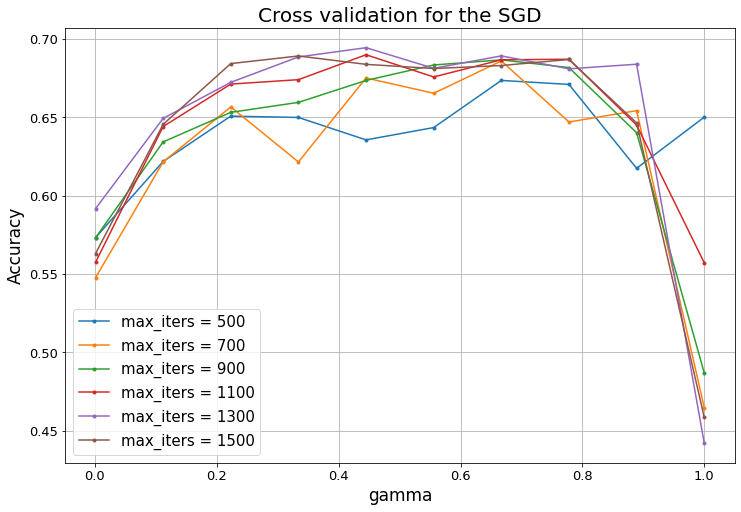

In [7]:
# parameters setting
type_ = 'SGD'
bd_left = -3
bd_right = 0
# grid for hyperparameters
gammas = np.linspace(10**bd_left, 10**bd_right, 10)
max_iters = np.arange(500, 1600, 200)
# cross validation
cross_validation_demo_baseline(type_=type_, y=y_train, tx=x_train, bd_left=bd_left, bd_right=bd_right, gammas=gammas, max_iters=max_iters, seed=seed)

**The best gamma = 0.5 and the best max_iter = 1300.  
We can see that there is no need to increase the max_iters parameter, because it doesn't bring accuracy improvements**

### Let's now apply best hyper-parameters to the model

In [8]:
max_iters = 1300
gamma = 0.5

np.random.seed(seed)
initial_w = np.random.rand((x_train.shape[1]))
w, loss = least_squares_SGD(y_train, x_train, initial_w, max_iters, gamma, plot_loss = False)
y_pred = predict_labels(w, x_test)

print("accuracy :", accuracy(y_pred, y_test))

accuracy : 0.69418


**Best accuracy for Least squares GD without data preprocessing is 0.69418**

## 3. Least Squares

In [9]:
w, loss = least_squares(y_train, x_train)
y_pred = predict_labels(w, x_test)

print("accuracy :", accuracy(y_pred, y_test))

accuracy : 0.7456


**Best accuracy for Least squares without data preprocessing is 0.7456**

## 4. Ridge regression

### Cross validation for least squares SGD

**Here degree = 0 means that we don't apply polynomical extantion to our features, so we are using x features without modifications**

100%|██████████| 1/1 [00:03<00:00,  3.45s/it]


Accuracy is 0.7441


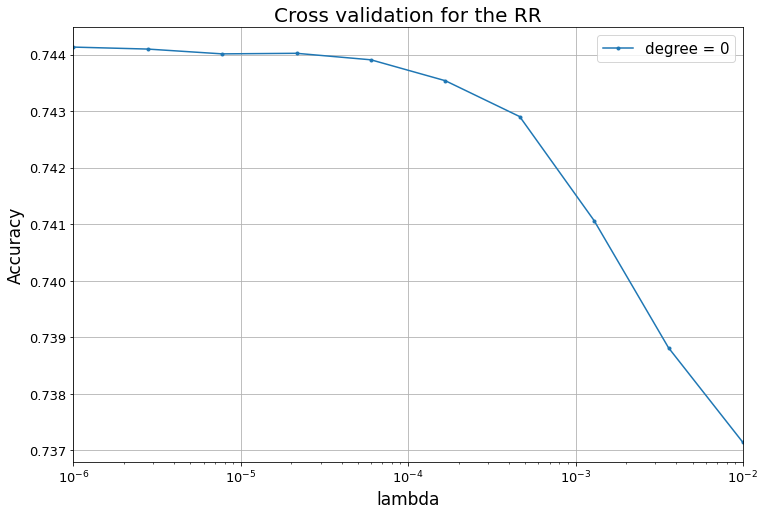

In [10]:
# parameters setting
type_ = 'RR'
bd_left = -6
bd_right = -2
# grid for hyperparameters
lambdas = np.logspace(bd_left, bd_right, 10)
degrees = np.arange(1)
# cross validation
cross_validation_demo_baseline(type_=type_, y=y_train, tx=x_train, bd_left=bd_left, bd_right=bd_right, lambdas=lambdas, degrees=degrees, seed=seed)

**The best lambda = $10^{-5}$**

### Let's now apply best hyper-parameters to the model

In [11]:
lambda_ = 1e-5
w, loss = ridge_regression(y_train, x_train, lambda_)
y_pred = predict_labels(w, x_test)

print("accuracy :", accuracy(y_pred, y_test))

accuracy : 0.74548


**Best accuracy for Ridge regression without data preprocessing is 0.74548**

## 5. Logistic Regression

### Cross validation for the logistic regression

100%|██████████| 5/5 [12:04<00:00, 144.89s/it]


Accuracy is 0.7095


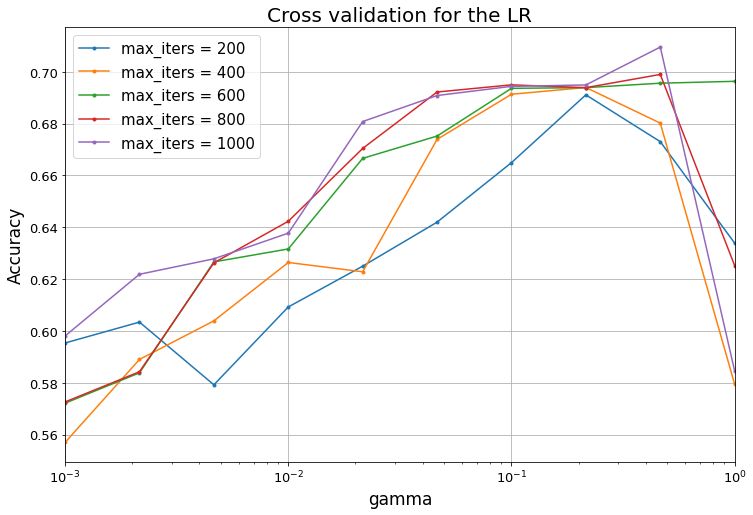

In [12]:
# parameters setting
type_ = 'LR'
bd_left = -3
bd_right = 0
# grid for hyperparameters
gammas = np.logspace(bd_left, bd_right, 10)
max_iters = np.arange(200, 1100, 200)
# cross validation
cross_validation_demo_baseline(type_=type_, y=y_train, tx=x_train, bd_left=bd_left, bd_right=bd_right, gammas=gammas, max_iters=max_iters, seed=seed)

**The best gamma = 0.5 and the best max_iter = 1000.  
We can see that there is no need to increase the max_iters parameter, because it doesn't bring accuracy improvements**

### Let's now apply best hyper-parameters to the model

In [13]:
max_iters = 1000
gamma = 0.5

np.random.seed(seed)
initial_w = np.random.rand((x_train.shape[1]))
w, loss = logistic_regression(y_train, x_train, initial_w, max_iters, gamma, plot_loss = False)
y_pred = predict_labels_for_log(w, x_test)
              
print("accuracy :", accuracy(y_pred, y_test))

accuracy : 0.6958


**Best accuracy for Least squares without data preprocessing is 0.6958**

## 6. Logistic Regression with Regularization

### Cross validation for logistic regression with regularizarion

**Here degree = 0 means that we don't apply polynomical extantion to our features, so we are using x features without modifications**

100%|██████████| 1/1 [04:06<00:00, 246.48s/it]


Accuracy is 0.6974


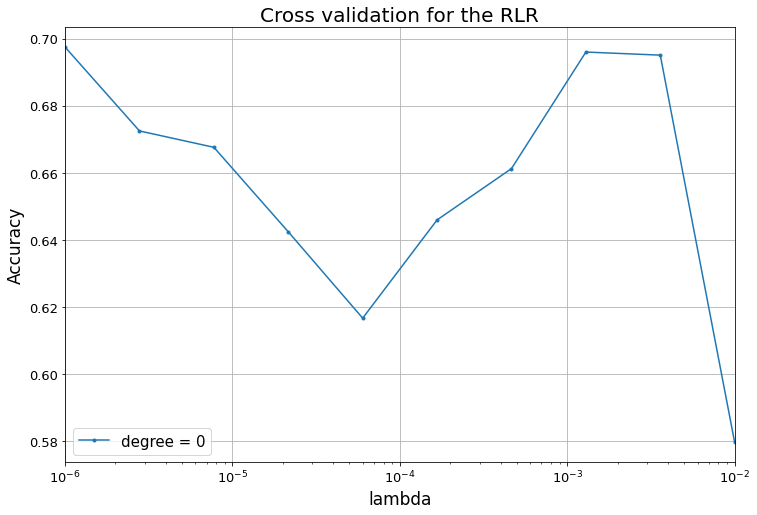

In [14]:
# parameters setting
type_ = 'RLR'
bd_left = -6
bd_right = -2
max_iters = 1000
gammas = 0.5
# grid for hyperparameters
lambdas = np.logspace(bd_left, bd_right, 10)
degrees = np.arange(1)
# cross validation
cross_validation_demo_baseline(type_=type_, y=y_train, tx=x_train, bd_left=bd_left, bd_right=bd_right, lambdas=lambdas, degrees=degrees, max_iters=max_iters, gammas=gammas, seed=seed)

**The best lambda = $10^{-6}$  
Here we used the same best max_iters and gamma as for the logistic regression without reguarization**

### Let's now apply best hyper-parameters to the model

In [15]:
max_iters = 1000
gamma = 0.5
lambda_ = 1e-6

np.random.seed(seed)
initial_w = np.random.rand((x_train.shape[1]))
w, loss = reg_logistic_regression(y_train, x_train, lambda_, initial_w, max_iters, gamma, plot_loss = False)
y_pred = predict_labels_for_log(w, x_test)
              
print("accuracy :", accuracy(y_pred, y_test))

accuracy : 0.6958


**Best accuracy for Least squares without data preprocessing is 0.6958**